## LINEAR REGRESSION

STEPS TO BE FOLLOWED
1) Design a model (input_size, output_size, forward_pass)
2) Construct loss and optimiser
3) Training loop 
   1) forward pass : compute prediction and loss
   2) backward pass : gradient
   3) update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [7]:
# generate dataset
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

In [8]:
n_samples, n_features = x.shape

In [10]:
# model
model = nn.Linear(n_features,n_features)

In [13]:
# loss and optimiser
lr = 0.01
epochs = 100
loss = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(),lr=lr)

In [14]:
# training loop
for e in range(epochs):
    y_pred = model(x)

    l = loss(y_pred, y)

    l.backward()

    optimiser.step()

    optimiser.zero_grad()

    if (e + 1) % 10 ==0:
        print(f"epoch: {e + 1}, loss: {l.item():.8f}")

epoch: 10, loss: 4278.93603516
epoch: 20, loss: 3196.49780273
epoch: 30, loss: 2412.70971680
epoch: 40, loss: 1844.59863281
epoch: 50, loss: 1432.43017578
epoch: 60, loss: 1133.14099121
epoch: 70, loss: 915.64361572
epoch: 80, loss: 757.46911621
epoch: 90, loss: 642.36010742
epoch: 100, loss: 558.53930664


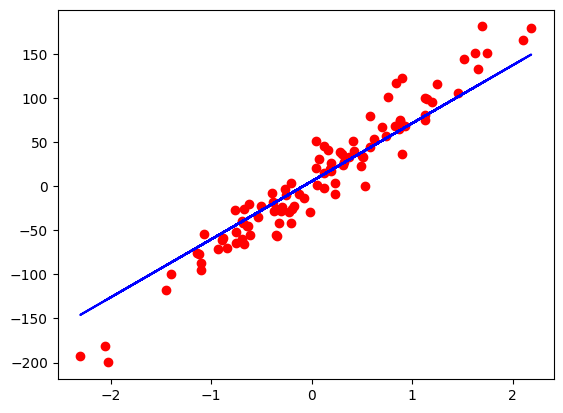

In [15]:
# plot
predicted = model(x).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()

## LOGISTIC REGRESSION

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
bc = datasets.load_breast_cancer()
x,y = bc.data, bc.target

In [18]:
n_samples, n_features = x.shape

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [24]:
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

In [28]:
# model
# f = wx + b

class LogisticRegression(nn.Module):

    def __init__(self, *args, **kwargs) -> None:
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_features,1)

    
    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
model = LogisticRegression(n_features)

In [29]:
# loss and optimiser
lr = 0.01
epochs = 100

loss = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=lr)

In [34]:
# training loop
for e in range(epochs):

    y_pred = model(x_train)
    l = loss(y_pred,y_train)
    l.backward()
    optimiser.step()
    optimiser.zero_grad()

    if (e+1) % 10 ==0:
        print(f"epoch: {e+1}, loss:{l.item():.4f}")


with torch.no_grad():
    y_pred = model(x_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])

    print(f"\n ACCURACY:{acc:.4f}")


epoch: 10, loss:0.1804
epoch: 20, loss:0.1769
epoch: 30, loss:0.1736
epoch: 40, loss:0.1705
epoch: 50, loss:0.1676
epoch: 60, loss:0.1649
epoch: 70, loss:0.1623
epoch: 80, loss:0.1599
epoch: 90, loss:0.1576
epoch: 100, loss:0.1554

 ACCURACY:0.9386
